In [27]:
!pip install jovian tweepy pandas matplotlib --upgrade --quiet

In [2]:
pip install nltk

     |████████████████████████████████| 1.4 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 738 kB 33.6 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=000618000b1b376da6a02f7a31d992308cd3ba741c36bf745614d1cc5faa2a90
  Stored in directory: /home/jovyan/.cache/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

     |████████████████████████████████| 636 kB 4.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tweepy 
import pandas as pd
import nltk 
from textblob import TextBlob

In [5]:
consumer_key="74ORGUf77FSvzFhkD1l8yM6WX"
consumer_secret="SDRK9wssweOtdgH0ivCO2I4IWLcLbC3MPI2EfYlTrJjyWdIPte"
access_token="815946042428493824-LLTYWxJRPjnYlpG5ITPcaZNvK8OxjMA"
access_token_secret="HgJkOE6dAJ1XBlOGFvwdp0TnBuzG9MMQjXyjIlBA3JyeC"

In [6]:
import jovian

In [7]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akashgahlot1926/twitter-3" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/akashgahlot1926/twitter-3


'https://jovian.ai/akashgahlot1926/twitter-3'

In [68]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)


In [69]:
search_word="गोवर्धन पूजा "
date_since="2020-11-15"

In [70]:
tweets=tweepy.Cursor(api.search,q=search_word,since=date_since,lang="en").items(2000)

In [74]:
df=pd.DataFrame([[tweet.text,tweet.user.screen_name] for tweet in tweets],columns=["Tweets","Username"])

In [75]:
df

,Tweets,Username
0,"RT @ChandanMatcha: I am the beginning, middle,...",VanillaSharma5
1,RT @Namomdas: This गोवर्धन पूजा bring home the...,dasisushma1
2,RT @GoluRaj47261365: A day of festivities and ...,VanillaSharma5
3,RT @sanjaybhind3: #govardhanpuja\nUnderprivile...,Shyamkamti8
4,RT @Raghvendrar83: #गोवर्धन_पूजा_की_शुभकामनाएं...,SethiSailoni
...,...,...
1995,RT @VinodVe48603664: The day of the innovative...,kapila41125049
1996,"@AbhimanyuRaohry #दिवालीपरजलाएं_ज्ञानकादीप,इस ...",kuldeep79082917
1997,RT @Pravinjdesai3: 🌸@HinduJagrutiOrg &amp; @Sa...,dnyadav
1998,RT @manish__jareda: #गोवर्धन_पूजा wish you all...,dnyadav


In [76]:
def analysis(text):
    return TextBlob(text).sentiment.polarity

In [77]:
df["analysis"]=df["Tweets"].apply(analysis)

In [78]:
df

,Tweets,Username,analysis
0,"RT @ChandanMatcha: I am the beginning, middle,...",VanillaSharma5,0.00
1,RT @Namomdas: This गोवर्धन पूजा bring home the...,dasisushma1,0.45
2,RT @GoluRaj47261365: A day of festivities and ...,VanillaSharma5,0.15
3,RT @sanjaybhind3: #govardhanpuja\nUnderprivile...,Shyamkamti8,0.00
4,RT @Raghvendrar83: #गोवर्धन_पूजा_की_शुभकामनाएं...,SethiSailoni,0.00
...,...,...,...
1995,RT @VinodVe48603664: The day of the innovative...,kapila41125049,0.50
1996,"@AbhimanyuRaohry #दिवालीपरजलाएं_ज्ञानकादीप,इस ...",kuldeep79082917,0.60
1997,RT @Pravinjdesai3: 🌸@HinduJagrutiOrg &amp; @Sa...,dnyadav,0.00
1998,RT @manish__jareda: #गोवर्धन_पूजा wish you all...,dnyadav,0.80


In [79]:
def pol(value):
    if value<0:
        return "negative"
    elif value==0:
        return "neutral"
    else:
        return "positive"

In [80]:
df["sentiment"]=df["analysis"].apply(pol)

In [81]:
df

,Tweets,Username,analysis,sentiment
0,"RT @ChandanMatcha: I am the beginning, middle,...",VanillaSharma5,0.00,neutral
1,RT @Namomdas: This गोवर्धन पूजा bring home the...,dasisushma1,0.45,positive
2,RT @GoluRaj47261365: A day of festivities and ...,VanillaSharma5,0.15,positive
3,RT @sanjaybhind3: #govardhanpuja\nUnderprivile...,Shyamkamti8,0.00,neutral
4,RT @Raghvendrar83: #गोवर्धन_पूजा_की_शुभकामनाएं...,SethiSailoni,0.00,neutral
...,...,...,...,...
1995,RT @VinodVe48603664: The day of the innovative...,kapila41125049,0.50,positive
1996,"@AbhimanyuRaohry #दिवालीपरजलाएं_ज्ञानकादीप,इस ...",kuldeep79082917,0.60,positive
1997,RT @Pravinjdesai3: 🌸@HinduJagrutiOrg &amp; @Sa...,dnyadav,0.00,neutral
1998,RT @manish__jareda: #गोवर्धन_पूजा wish you all...,dnyadav,0.80,positive


In [82]:
import matplotlib.pyplot as plt

In [83]:
value=df.sentiment.value_counts()

In [84]:
value

positive    1625
neutral      290
negative      85
Name: sentiment, dtype: int64

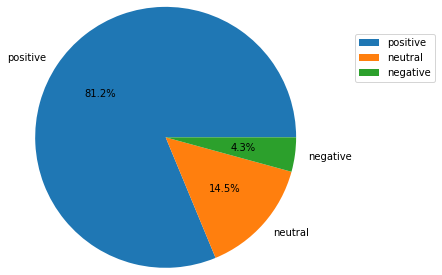

In [85]:
plt.pie(value.values,labels=value.index,autopct="%1.1f%%",radius=1.5);
plt.legend(value.index,bbox_to_anchor=(1.35, 1),ncol=1);

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [72]:
api.update_status("hello tweepy")

Status(_api=<tweepy.api.API object at 0x7f269398c6d0>, _json={'created_at': 'Sun Nov 15 07:48:45 +0000 2020', 'id': 1327881206944370688, 'id_str': '1327881206944370688', 'text': 'hello tweepy', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 815946042428493824, 'id_str': '815946042428493824', 'name': 'Akash Gahlot', 'screen_name': 'akashgahlot17', 'location': 'Meerut', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 5, 'friends_count': 218, 'listed_count': 0, 'created_at': 'Mon Jan 02 15:41:10 +0000 2017', 'favourites_count': 67, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 17, 'lang': None, 'contributors_enabled': False, 'is_translat

In [73]:
api.update_status("hello tweepy, this tweet is posted by twitter api")

Status(_api=<tweepy.api.API object at 0x7f269398c6d0>, _json={'created_at': 'Sun Nov 15 07:52:29 +0000 2020', 'id': 1327882147970093056, 'id_str': '1327882147970093056', 'text': 'hello tweepy, this tweet is posted by twitter api', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 815946042428493824, 'id_str': '815946042428493824', 'name': 'Akash Gahlot', 'screen_name': 'akashgahlot17', 'location': 'Meerut', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 5, 'friends_count': 218, 'listed_count': 0, 'created_at': 'Mon Jan 02 15:41:10 +0000 2017', 'favourites_count': 67, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 17, 'lang': None, 'contr